# Project 1: FIFA MONEYBALL

Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


Import data

In [3]:
data = pd.read_csv('fifa21_male2.csv')

# CLEANING and EXPLORING

In [4]:
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


Check for null values - Poisition has a spike, but considering data size, is ok.

In [5]:
#pd.set_option('display.max_rows', None)
data.isnull().sum()

ID                      0
Name                    0
Age                     0
OVA                     0
Nationality             0
Club                   23
BOV                     0
BP                      0
Position              413
Player Photo            0
Club Logo              23
Flag Photo              0
POT                     0
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 58
Loan Date End       16215
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                58
Skill                   0
Dribbling               0
Curve                  58
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed

Removing columns that i will not use - keeping the most basics fo simplicity

In [5]:
 
data = data.drop(columns=['Player Photo', 'Club Logo', 'Flag Photo', 'Loan Date End', 'W/F', 'SM', 'A/W', 'D/W', 'LS',	'ST', 'RS',	'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'IR', 'BOV', 'BP',
 'BOV'])
data

,ID,Name,Age,OVA,Nationality,Club,Position,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,71,59,70,71,68,69,4,Male
1,16,Luis García,37,71,Spain,KAS Eupen,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,4,Male
2,27,J. Cole,33,71,England,Coventry City,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52,11,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,NaN,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,61,66,66,69,47,60,3,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59,149,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,CB,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,5,"Sep 29, 2020",€550K,€2K,€0,"Jun 30, 2021 On Loan",197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,54,30,37,48,64,69,5,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,CAM CM,66,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,10,"Aug 20, 2020",€130K,€3K,€273K,2020 ~ 2021,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,62,46,57,56,43,55,5,Male
17122,259091,C. Barrett,18,56,England,Burnley,RB,67,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,11,"Aug 20, 2020",€130K,€2K,€273K,2020 ~ 2022,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,63,35,44,52,54,55,3,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB LB,73,SK Sturm Graz 2020 ~ 2023,"5'9""",148lbs,Right,11,"Sep 30, 2020",€475K,€3K,€784K,2020 ~ 2023,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.0,180,57,62,61.0,51,15,13,8,6,9,1579,335,71,34,58,59,59,54,5,Male


Modify column names to lower case

In [6]:

data.columns = data.columns.str.lower()
data

,id,name,age,ova,nationality,club,position,pot,team & contract,height,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy,hits,gender
0,2,G. Pasquale,33,69,Italy,Udinese,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,71,59,70,71,68,69,4,Male
1,16,Luis García,37,71,Spain,KAS Eupen,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,4,Male
2,27,J. Cole,33,71,England,Coventry City,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52,11,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,NaN,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,61,66,66,69,47,60,3,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59,149,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,CB,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,5,"Sep 29, 2020",€550K,€2K,€0,"Jun 30, 2021 On Loan",197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,54,30,37,48,64,69,5,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,CAM CM,66,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,10,"Aug 20, 2020",€130K,€3K,€273K,2020 ~ 2021,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,62,46,57,56,43,55,5,Male
17122,259091,C. Barrett,18,56,England,Burnley,RB,67,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,11,"Aug 20, 2020",€130K,€2K,€273K,2020 ~ 2022,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,63,35,44,52,54,55,3,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,RB LB,73,SK Sturm Graz 2020 ~ 2023,"5'9""",148lbs,Right,11,"Sep 30, 2020",€475K,€3K,€784K,2020 ~ 2023,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.0,180,57,62,61.0,51,15,13,8,6,9,1579,335,71,34,58,59,59,54,5,Male


Replacing symbols with numbers

In [7]:

data['value'] = data['value'].apply(lambda x: (str(x).replace('€', '')))
data['wage'] = data['wage'].apply(lambda x: (str(x).replace('€', '')))
data['release clause'] = data['release clause'].apply(lambda x: (str(x).replace('€', '')))

data['value'] = data['value'].apply(lambda x: (str(x).replace('.', '')))
data['wage'] = data['wage'].apply(lambda x: (str(x).replace('.', '')))
data['release clause'] = data['release clause'].apply(lambda x: (str(x).replace('.', '')))

data['value'] = data['value'].apply(lambda x: (str(x).replace('K', '000')))
data['wage'] = data['wage'].apply(lambda x: (str(x).replace('K', '000')))
data['release clause'] = data['release clause'].apply(lambda x: (str(x).replace('K', '000')))

data['value'] = data['value'].apply(lambda x: (str(x).replace('M', '000000')))
data['wage'] = data['wage'].apply(lambda x: (str(x).replace('M', '000000')))
data['release clause'] = data['release clause'].apply(lambda x: (str(x).replace('M', '000000')))

data['value'] = pd.to_numeric(data['value'])
data['wage'] = pd.to_numeric(data['wage'])
data['release clause'] = pd.to_numeric(data['release clause'])

data[['value', 'wage', 'release clause']]

,value,wage,release clause
0,625000,7000,0
1,600000,7000,11000000
2,11000000,15000,0
3,0,0,0
4,55000000,12000,72000000
...,...,...,...
17120,550000,2000,0
17121,130000,3000,273000
17122,130000,2000,273000
17123,475000,3000,784000


Check if any column that I will need later as numeric - Hits column 

In [8]:

data.select_dtypes(include = object)

,name,nationality,club,position,team & contract,height,weight,foot,joined,contract,hits,gender
0,G. Pasquale,Italy,Udinese,LM,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,"Jul 1, 2008",2008 ~ 2016,4,Male
1,Luis García,Spain,KAS Eupen,CM CAM CDM,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,"Jul 19, 2014",2014 ~ 2019,4,Male
2,J. Cole,England,Coventry City,CAM RM RW LM,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,"Jan 7, 2016",2016 ~ 2020,11,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,NaN,Sunderland 2009,"5'11""",165lbs,Right,NaN,2009,3,Male
4,Iniesta,Spain,Vissel Kobe,CM CAM,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,"Jul 16, 2018",2018 ~ 2021,149,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,"Sep 29, 2020","Jun 30, 2021 On Loan",5,Male
17121,W. Rickard,Wales,Burnley,CAM CM,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,"Aug 20, 2020",2020 ~ 2021,5,Male
17122,C. Barrett,England,Burnley,RB,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,"Aug 20, 2020",2020 ~ 2022,3,Male
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB LB,SK Sturm Graz 2020 ~ 2023,"5'9""",148lbs,Right,"Sep 30, 2020",2020 ~ 2023,5,Male


In [ ]:
Cleaning hits in the same way 

In [9]:

data['hits'] = data['hits'].apply(lambda x: (str(x).replace('.', '')))
data['hits'] = data['hits'].apply(lambda x: (str(x).replace('K', '000')))
data['hits'] = pd.to_numeric(data['hits'])

data['hits']

0          4
1          4
2         11
3          3
4        149
        ... 
17120      5
17121      5
17122      3
17123      5
17124      4
Name: hits, Length: 17125, dtype: int64

In [31]:
data2 = data.select_dtypes(include = np.number)

In [32]:
data2.columns

Index(['id', 'age', 'ova', 'pot', 'growth', 'value', 'wage', 'release clause',
       'attacking', 'crossing', 'finishing', 'heading accuracy',
       'short passing', 'volleys', 'skill', 'dribbling', 'curve',
       'fk accuracy', 'long passing', 'ball control', 'movement',
       'acceleration', 'sprint speed', 'agility', 'reactions', 'balance',
       'power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing tackle',
       'sliding tackle', 'goalkeeping', 'gk diving', 'gk handling',
       'gk kicking', 'gk positioning', 'gk reflexes', 'total stats',
       'base stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits'],
      dtype='object')

dataframe with columns that i will later use for macine learning - check for collerations

In [47]:
data_corr = data[['attacking', 'crossing', 'finishing', 'heading accuracy',
       'short passing', 'volleys', 'skill', 'dribbling',
        'long passing', 'ball control', 
       'acceleration', 'sprint speed', 'agility', 'reactions', 'balance',
       'power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing tackle',
       'sliding tackle', 'goalkeeping', 'value']]

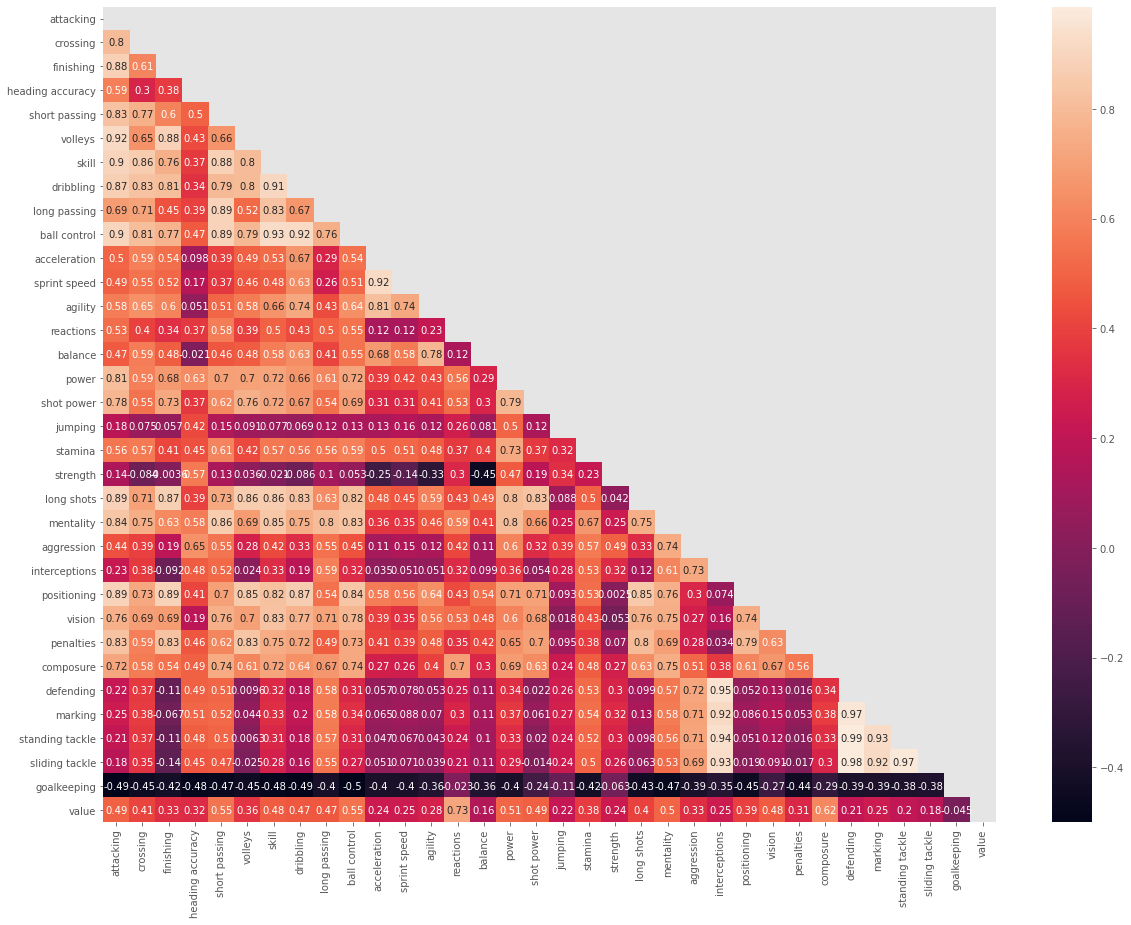

In [48]:
mask = np.zeros_like(data_corr.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(data_corr.corr(), mask=mask, annot=True)
plt.show()

There are some high correlations (.9 or higher) but I will try it with machine learning anyhow

# Questions

1. most preferred player foot
2. Comparing wage and position of player
3. Highest paid by country

In [14]:
data.head()

,id,name,age,ova,nationality,club,position,pot,team & contract,height,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy,hits,gender
0,2,G. Pasquale,33,69,Italy,Udinese,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",625000,7000,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,71,59,70,71,68,69,4,Male
1,16,Luis García,37,71,Spain,KAS Eupen,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",600000,7000,11000000,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,4,Male
2,27,J. Cole,33,71,England,Coventry City,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",11000000,15000,0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52,11,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,NaN,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,0,0,0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,61,66,66,69,47,60,3,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",55000000,12000,72000000,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59,149,Male


Most preferred player foot

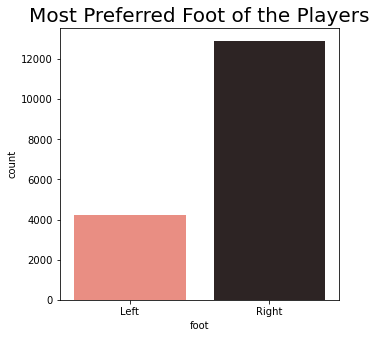

In [15]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.countplot(data['foot'], palette = 'dark:salmon_r')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

Comparing wage and position of player

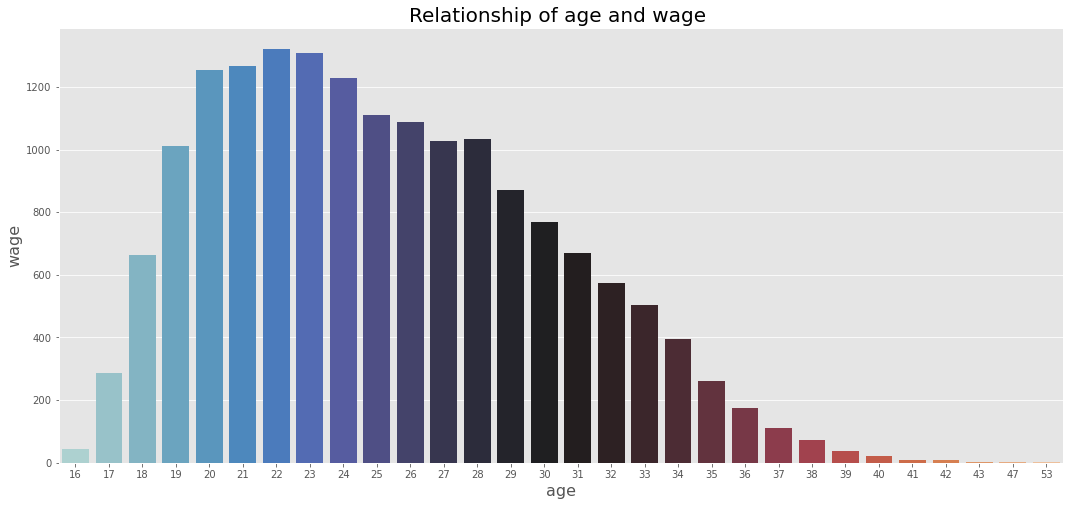

In [16]:
plt.figure(figsize = (18, 8))
plt.style.use('ggplot')
ax = sns.countplot('age', data = data, palette = 'icefire')
ax.set_xlabel(xlabel = 'age', fontsize = 16)
ax.set_ylabel(ylabel = 'wage', fontsize = 16)
ax.set_title(label = 'Relationship of age and wage ', fontsize = 20)
plt.show()

 Not suprising, most high paid are between 20-23. However a suprising spike between 27-28, though very small. 

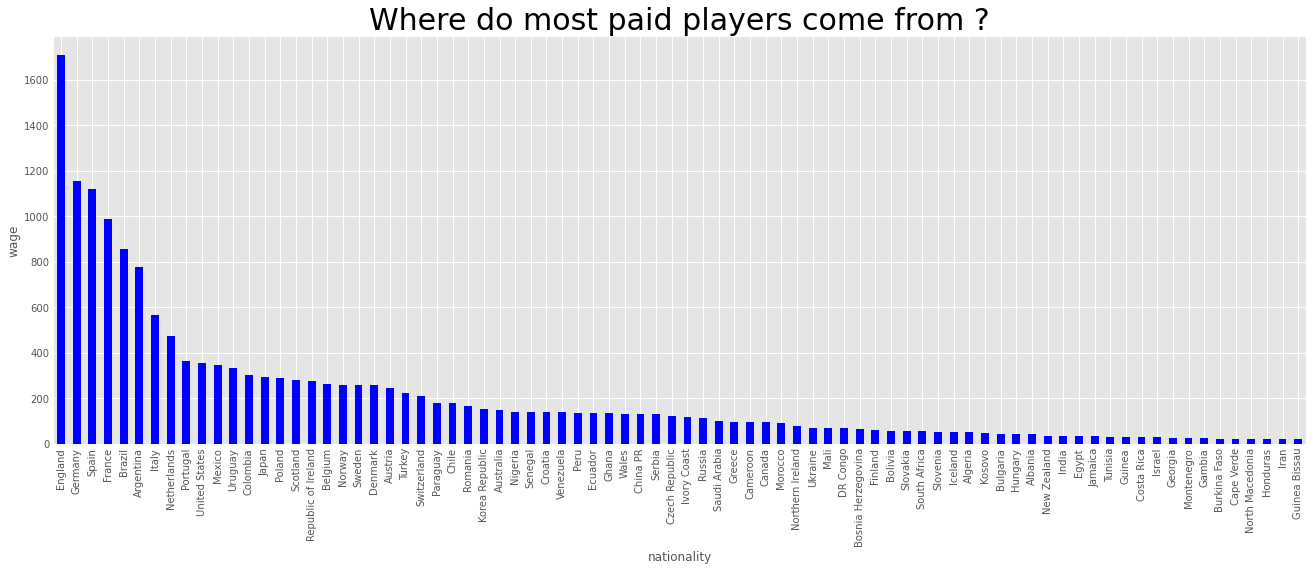

In [67]:
plt.style.use('ggplot')
data['nationality'].value_counts().head(80).plot.bar(color = 'blue', figsize = (20, 7))
plt.title('Where do most paid players come from ?', fontsize = 30, fontweight = 20)
plt.xlabel('nationality')
plt.ylabel('wage')
plt.show()

Amongst most high paid players would be England, germany, spain

# Machine learning 

Normalize with boxcox 

In [18]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [19]:
data, _ci = boxcox_transform(data)
data.select_dtypes(np.number)

,id,age,ova,pot,growth,value,wage,release clause,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy,hits
0,2.450613e+00,2.333615,58.848889,13.172802,4.584237,7.842165,6.244139,40.651872,56934.043922,519.861971,92.405244,623.109242,14332.041639,72.529066,21126.604194,3509.565771,126.785063,34.968870,799.195128,14162.192412,712496.156462,3459.596157,4688.176875,1953.780186,209.911868,1600.661728,89046.968991,590.769067,947.972059,2925.748078,830.772753,201.671066,68971.821546,362.090908,61.853209,433.918776,345.640080,126.870774,674.351163,214.493502,87.313895,80.681960,57.524846,1.028941,1.190123,0.956792,1.209168,1.123424,1.158236,1.703642e+07,596.439191,2463.742155,453.868664,283.726599,4182.873266,75.923321,2907.224432,0.994677
1,1.771027e+03,2.380795,60.507424,13.376923,4.584237,7.829569,6.244139,34.823821,66139.801903,446.511318,124.781721,659.693264,16939.287403,86.245844,24768.294488,3122.648141,160.649222,44.262983,839.115074,14162.192412,518895.289657,2297.446850,2025.133541,1630.926755,193.813258,1784.436837,77245.658833,603.532778,631.872935,2506.594458,669.571752,213.590543,88882.191075,354.719134,63.622612,535.695642,401.805764,216.175597,1085.974422,157.118281,87.313895,48.695660,33.863223,1.028941,1.110789,1.163142,1.186805,1.140941,1.143180,1.657047e+07,560.298652,1375.061893,584.977081,301.077674,3935.403734,64.221941,2411.757129,0.994677
2,8.999458e+03,2.333615,60.507424,13.376923,4.584237,8.622632,6.594838,40.651872,66139.801903,574.633760,124.781721,334.145282,17491.941822,95.941201,27001.185770,4133.894547,173.060137,43.304106,799.195128,17835.988029,478077.050523,1659.915979,1394.141014,2125.862520,170.278947,1928.462466,58781.335699,565.546685,716.546451,492.274028,594.495281,205.625599,67648.651696,340.121212,35.102392,500.904041,410.053803,182.766738,674.351163,100.952649,41.083240,37.831809,25.521368,1.026811,1.110789,1.010981,1.186805,1.199238,1.047854,1.396395e+07,511.846827,992.112263,571.299910,318.724409,4973.603546,38.771068,1626.147109,1.385314
3,2.199606e+04,2.369619,58.018831,14.448024,7.071382,8.704224,6.446415,40.651872,40306.154688,312.146481,139.135727,641.293042,19213.448114,54.979048,12677.794057,3029.567954,91.202854,27.800399,702.942079,17280.310143,134343.664473,2564.666312,3209.860895,1767.457716,155.019643,1456.855058,41107.783595,457.197100,879.664198,1571.713825,789.111882,166.953300,49004.057770,270.145711,62.738093,535.695642,266.388996,197.452466,674.351163,76.064403,39.799323,46.270350,38.897342,1.032801,0.958048,1.241419,1.344165,1.232703,1.235501,7.439598e+06,535.252888,1820.130636,544.317993,261.064613,3935.403734,51.439501,2181.787768,0.841636
4,3.294619e+04,2.369619,68.770363,14.353973,4.584237,8.981457,6.494475,42.870727,78631.537298,519.861971,136.725012,535.474429,25658.655081,101.512933,29714.856059,4811.233903,163.118757,39.913982,1095.221455,25335.993051,707460.394125,2751.413149,2581.311194,2619.350974,234.641503,1928.462466,64496.470514,504.297365,372.553067,2047.398290,708.503478,209.598818,92968.831341,263.434565,62.738093,607.799687,576.805949,201.165093,1333.938785,186.309641,84.617315,65.823546,46.997605,1.023647,1.012422,1.176342,1.017973,1.168884,1.047854,1.882235e+07,615.356882,1645.953772,598.777474,373.371302,6141.736449,70.063815,2107.755587,1.811593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,2.110995e+16,2.155150,54.693131,13.172802

In [20]:
#data_ml = data[['value', 'wage', 'crossing', 'finishing', 'short passing', 'dribbling', 'long passing', 'ball control', 'acceleration', 'stamina']]

In [39]:
data_ml = data[['attacking', 'crossing', 'finishing', 'heading accuracy',
       'short passing', 'volleys', 'skill', 'dribbling',
        'long passing', 'ball control', 
       'acceleration', 'sprint speed', 'agility', 'reactions', 'balance',
       'power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing tackle',
       'sliding tackle', 'goalkeeping', 'value']]

I will use only numerical data as it has the information needed

In [21]:
#X_num = data_ml.select_dtypes(include = np.number)
#X_cat = data_ml.select_dtypes(include = object)

In [22]:
#encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='error') 
#onehot = encoder.fit_transform(X_cat)

In [23]:
#df = pd.get_dummies(data1, drop_first=True)

In [40]:
X = data_ml.drop('value', axis=1)
y = data_ml['value']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
predictions = model.predict(X_test)

In [44]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.6262675769537148, 0.2873715510382524, 0.3567979670226704)

The r2score value is moderate, meaning my model is ok, but not good. 

In [45]:
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

In [46]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
11270,1000000.0,1.477359e+06,4.773587e+05
13100,500000.0,1.449594e+06,9.495936e+05
15752,925000.0,1.313658e+06,3.886578e+05
9053,925000.0,1.290387e+06,3.653869e+05
2057,36000000.0,9.068923e+06,2.693108e+07
...,...,...,...
15422,900000.0,6.398532e+05,2.601468e+05
5248,120000.0,1.366423e+05,1.664231e+04
9932,12000000.0,4.557379e+06,7.442621e+06
11238,850000.0,2.015445e+06,1.165445e+06
